# Práctica Programación en Entornos de datos 2020-2021

## Jorge Pablo Ávila Gómez

**1. Explora el fichero y decide cómo tienes que realizar la importación para
poder guardar la información. ¿En qué estructura lo vas a guardar y qué
información concreta contiene? Escribe el código asociado y trata de
optimizar el espacio utilizado.**

Los datos se van a guardar en un dataframe de Pandas, pero se van a almacenar de una manera peculiar. Los datos viene representados en filas con la fecha del sorteo ganador, seguido de los 5 números y las 2 estrellas. Se van a preparar dos dataframes, uno para los números y otro para las estrellas. Como no hay ningún orden entre los números y las estrellas, la forma de los dataframes será una fila para cada número o estrella y la fecha en la que ese número estuvo en una combinación ganadora. Se ha elegido esta forma de almacenar los datos porque facilita la contestación de las preguntas 2 y 3.

In [1]:
import pandas as pd

# Se lee el archivo con el histórico y se preparan dos listas de python
# una para los números y otra para las estrellas
# que se pasarán a dataframes de pandas
f = open("historicoEuromillones.csv")
numbers = []
stars = []
for line in f: # Por cada fecha:
    temp = line.strip().split(",")
    for i in range(5):
        numbers.append([temp[0], temp[i + 1]]) # fecha + los 5 números
    stars.append([temp[0], temp[-2]]) # fecha + una estrella
    stars.append([temp[0], temp[-1]]) # fecha + una estrella
f.close()

In [2]:
# dataframe con los números premiados
df_numbers = (
    pd.DataFrame(numbers, columns=["date", "numbers"])
    .drop([0, 1, 2, 3, 4]) # filas con cabecera o vacías
    .reset_index(drop=True)
)
#dataframe con las estrellas premiadas
df_stars = (
    pd.DataFrame(stars, columns=["date", "stars"])
    .drop([0, 1]) # filas con cabecera o vacías
    .reset_index(drop=True)
)

Los dataframes son una estructura muy adecuada para representar datos tabulados, además permite que cada columna tenga un tipo de datos diferente. En este caso vamos a usar una columna de tipo fecha y el resto van a ser columnas de tipo número entero.

In [3]:
df_numbers.head(10)

,date,numbers
0,13/10/2020,05
1,13/10/2020,14
2,13/10/2020,38
3,13/10/2020,41
4,13/10/2020,46
5,9/10/2020,11
6,9/10/2020,15
7,9/10/2020,35
8,9/10/2020,41
9,9/10/2020,50


In [4]:
df_stars.head(10)

,date,stars
0,13/10/2020,01
1,13/10/2020,10
2,9/10/2020,05
3,9/10/2020,08
4,6/10/2020,09
5,6/10/2020,11
6,2/10/2020,03
7,2/10/2020,09
8,29/09/2020,11
9,29/09/2020,12


Vamos a estudiar el espacio utilizado por los dataframes para optimizarlo:

In [5]:
print(df_numbers.info(memory_usage="deep"))
print(df_stars.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6815 entries, 0 to 6814
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     6815 non-null   object
 1   numbers  6815 non-null   object
dtypes: object(2)
memory usage: 836.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2726 entries, 0 to 2725
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2726 non-null   object
 1   stars   2726 non-null   object
dtypes: object(2)
memory usage: 334.8 KB
None


Vemos que son dataframes ligeros, no vamos a tener problemas de memoria al trabajar con ellos, pero podemos intentar optimizar los tipos de cada columna. Además sería preferible que las columnas numbers y stars sean de tipo entero para poder hacer calculos numéricos y que la columna date sea de tipo datetime.

In [6]:
# Pasamos las columnas numbers y stars al tipo numérico que menos memoria necesite
# Pasamos las colmunas date a tipo datetime, es importante dayfirst=True 
# para indicar que las fechas se encuentran en formato europeo con el día primero
df_numbers["numbers"] = pd.to_numeric(df_numbers["numbers"], downcast="unsigned")
df_numbers["date"] = pd.to_datetime(df_numbers["date"], dayfirst=True)

df_stars["stars"] = pd.to_numeric(df_stars["stars"], downcast="unsigned")
df_stars["date"] = pd.to_datetime(df_stars["date"], dayfirst=True)

print(df_numbers.info(memory_usage="deep"))
print(df_stars.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6815 entries, 0 to 6814
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     6815 non-null   datetime64[ns]
 1   numbers  6815 non-null   uint8         
dtypes: datetime64[ns](1), uint8(1)
memory usage: 60.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2726 entries, 0 to 2725
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2726 non-null   datetime64[ns]
 1   stars   2726 non-null   uint8         
dtypes: datetime64[ns](1), uint8(1)
memory usage: 24.1 KB
None


Vemos que conseguimos disminuir bastante la memoria necesaria y además, tenemos los tipos de datos adecuados para poder trabajar con ellos en los siguientes apartados.

In [7]:
df_numbers.head(10)

,date,numbers
0,2020-10-13,5
1,2020-10-13,14
2,2020-10-13,38
3,2020-10-13,41
4,2020-10-13,46
5,2020-10-09,11
6,2020-10-09,15
7,2020-10-09,35
8,2020-10-09,41
9,2020-10-09,50


In [8]:
df_stars.head(10)

,date,stars
0,2020-10-13,1
1,2020-10-13,10
2,2020-10-09,5
3,2020-10-09,8
4,2020-10-06,9
5,2020-10-06,11
6,2020-10-02,3
7,2020-10-02,9
8,2020-09-29,11
9,2020-09-29,12


**2. Queremos obtener algunas estadísticas relativas al histórico.
Concretamente, ¿cuál es la moda, mediana y media de los números? ¿y
de las estrellas? ¿puedes obtenerlo para cada año? ¿y para cada mes?
Nota: cuando decimos cada mes, nos referimos a todos los meses de, por
ejemplo, enero en conjunto. No al mes de enero de 2018 por un lado, al
mes de enero de 2017 por otro lado, etc.
Escribe el código asociado para realizar todos estos cálculos.**

Podemos usar las funciones mean, median y mode para calcular estos valores de todos los números y estrellas:

In [9]:
print(f"La media de los números es: {df_numbers.numbers.mean():0.2f}")
print(f"La mediana de los números es: {df_numbers.numbers.median()}")
print(f"La moda de los números es: {df_numbers.numbers.mode()[0]}")
print(f"La media de las estrellas es: {df_stars.stars.mean():0.2f}")
print(f"La mediana de las estrellas es: {df_stars.stars.median()}")
print(f"La moda de las estrellas es: {df_stars.stars.mode()[0]}")

La media de los números es: 25.34
La mediana de los números es: 25.0
La moda de los números es: 23
La media de las estrellas es: 5.88
La mediana de las estrellas es: 6.0
La moda de las estrellas es: 2


Para calcular los valores por años, primero se agrupan los dataframes por año. Aprovechando que la columna date es de tipo datetime, podemos agrupar por año mediante ``groupby(df_numbers["date"].dt.year)``. Podemos aplicar las funciones mean y median para calcular la media y mediana directamente. Por otro lado, para calcular la moda, tenemos que aplicar `agg(pd.Series.mode)` ya que la función mode no ha sido implementada para objetos groupby, pero mediante la función agg podemos usar funciones para Series en objetos groupby. Por último, para presentar todos los datos juntos tabulados se ha realizado un merge de todas las series.

In [10]:
# Estadística agrupada por años
results_year = (
    df_numbers.groupby(df_numbers["date"].dt.year).mean() # media de los números
    .merge(df_numbers.groupby(df_numbers["date"].dt.year).median(), on="date") # mediana
    .merge(
        df_numbers.groupby(df_numbers["date"].dt.year) # moda
        .numbers.agg(pd.Series.mode)
        .rename("mode"),
        on="date",
    )
    .merge(df_stars.groupby(df_stars["date"].dt.year).mean(), on="date") # media estrellas
    .merge(df_stars.groupby(df_stars["date"].dt.year).median(), on="date") # mediana
    .merge(
        df_stars.groupby(df_stars["date"].dt.year) # moda
        .stars.agg(pd.Series.mode)
        .rename("mode"),
        on="date",
    )
)

results_year.columns = [
    "mean_numbers",
    "median_number",
    "mode_numbers",
    "mean_stars",
    "median_stars",
    "mode_stars",
]
results_year

,mean_numbers,median_number,mode_numbers,mean_stars,median_stars,mode_stars
date,,,,,,
2004,24.148936,24,1,5.042553,5.0,5
2005,25.311538,25,11,4.923077,5.0,1
2006,24.669231,24,50,4.759615,5.0,3
2007,25.638462,25,41,5.076923,5.0,"[6, 8]"
2008,24.630769,22,50,5.096154,5.0,"[4, 5, 7]"
2009,25.769231,25,20,4.817308,5.0,"[3, 5]"
2010,26.335849,28,"[38, 46]",5.264151,5.5,7
2011,25.653488,24,12,5.773256,5.5,2
2012,25.088462,25,10,6.100962,6.0,2


Para las estadísticas agrupadas por meses se sigue la misma estrategia anterior pero en este caso realizando la agrupación por meses: ``groupby(df_numbers["date"].dt.month)``.

In [11]:
results_month = (
    df_numbers.groupby(df_numbers["date"].dt.month).mean() # media de los números
    .merge(df_numbers.groupby(df_numbers["date"].dt.month).median(), on="date") # mediana
    .merge(
        df_numbers.groupby(df_numbers["date"].dt.month) # moda
        .numbers.agg(pd.Series.mode)
        .rename("mode"),
        on="date",
    )
    .merge(df_stars.groupby(df_stars["date"].dt.month).mean(), on="date") # media de las estrellas
    .merge(df_stars.groupby(df_stars["date"].dt.month).median(), on="date")  # mediana
    .merge(
        df_stars.groupby(df_stars["date"].dt.month)  # moda
        .stars.agg(pd.Series.mode)
        .rename("mode"),
        on="date",
    )
)

results_month.columns = [
    "mean_numbers",
    "median_number",
    "mode_numbers",
    "mean_stars",
    "median_stars",
    "mode_stars",
]
results_month

,mean_numbers,median_number,mode_numbers,mean_stars,median_stars,mode_stars
date,,,,,,
1,24.677477,24.0,10,5.792793,6,8
2,26.148077,27.0,"[3, 30, 50]",6.014423,6,9
3,25.340351,26.0,23,6.381579,6,6
4,25.887500,25.5,24,5.678571,5,5
5,25.176471,26.0,26,5.991597,6,6
6,25.342609,25.0,39,5.786957,6,1
7,25.114050,24.0,"[23, 49]",5.859504,6,3
8,25.811864,26.0,42,6.016949,6,5
9,25.813793,27.0,"[6, 14, 38]",5.750000,6,"[1, 9]"


**3. ¿Cuáles han sido los 5 números más repetidos? ¿y las 2 estrellas?
Responde a las mismas preguntas para cada año y cada mes (entendiendo
mes igual que en el ejercicio anterior).
Escribe el código asociado para realizar todos los cálculos.**

Para contestar a estas preguntas se ha escrito dos funciones para contar los números y estrellas más repetidos. La única diferencia entre las funciones es que para los números busca los 5 más repetidos y para las estrellas busca solo 2. La funcionalidad especial de estas funciones es que si hay empate devuelve todos los números empatados, y por eso es que se han escrito estas funciones y no se han usado otras funciones más estándar.

In [12]:
from collections import Counter
def most_frec_numbers(x):
    sol = []
    prev = 0 # frecuencia previa
    # Clave: número, valor: frecuencia
    # iteramos para añadir los 5 más frecuentes
    # si hay empate sigue añadiendo
    # si hemos superado el umbral (5) deja de iterar
    for number in Counter(x).most_common():
        if number[1] >= prev: # seguir añadiendo si hay empate
            prev = number[1]
            sol.append(number[0])
        elif number[1] < prev and len(sol) < 5: # añade si hay menos de 5
            prev = number[1]
            sol.append(number[0])
        elif number[1] < prev and len(sol) >= 5: # se ha llegado ya a 5 números
            break
    return sol

def most_frec_stars(x):
    sol = []
    prev = 0 # frecuencia previa
    # Clave: estrella, valor: frecuencia
    # iteramos para añadir los 2 más frecuentes
    # si hay empate sigue añadiendo
    # si hemos superado el umbral (2) deja de iterar
    for number in Counter(x).most_common():
        if number[1] >= prev: # seguir añadiendo si hay empate
            prev = number[1]
            sol.append(number[0])
        elif number[1] < prev and len(sol) < 2: # añade si hay menos de 2
            prev = number[1]
            sol.append(number[0])
        elif number[1] < prev and len(sol) >= 2: # se ha llegado ya a 2 números
            break
    return sol


Usamos las funciones anteriores para encontrar los números y estrellas más frecuentes:

In [13]:
most_frec_numbers(df_numbers.numbers)

[23, 44, 50, 19, 4]

In [14]:
most_frec_stars(df_stars.stars)

[2, 8]

Para encontrar los números y estrellas más frecuentes agrupados por meses y años, agrupamos como en el apartado anterior y aplicamos las funciones escritas para este apartado usando el método agg: `agg(repetidos_numbers)`

In [15]:
# Números más frecuentes por año
df_numbers.groupby(df_numbers["date"].dt.year).numbers.agg(most_frec_numbers)

date
2004                                   [1, 15, 4, 37, 10]
2005                                  [11, 50, 3, 47, 26]
2006                          [50, 9, 12, 8, 5, 49, 3, 1]
2007    [41, 22, 25, 20, 45, 7, 37, 30, 36, 48, 19, 29...
2008                                  [50, 19, 45, 7, 37]
2009                           [20, 30, 4, 5, 14, 35, 29]
2010                                   [38, 46, 36, 4, 9]
2011                                 [12, 50, 23, 28, 14]
2012                             [10, 44, 27, 23, 28, 25]
2013                                 [13, 28, 42, 43, 11]
2014                               [13, 38, 26, 25, 3, 4]
2015                         [30, 29, 39, 17, 18, 45, 14]
2016                                 [37, 10, 32, 27, 28]
2017          [17, 30, 20, 4, 44, 31, 29, 19, 10, 27, 49]
2018                                 [15, 48, 23, 17, 44]
2019                                   [1, 39, 42, 3, 32]
2020                                  [11, 5, 46, 15, 27]
Name: num

In [16]:
# Estrellas más frecuentes por año
df_stars.groupby(df_stars["date"].dt.year).stars.agg(most_frec_stars)

date
2004           [5, 6]
2005        [1, 7, 3]
2006     [3, 7, 1, 6]
2007           [6, 8]
2008        [7, 5, 4]
2009           [5, 3]
2010           [7, 3]
2011        [2, 8, 5]
2012    [2, 10, 8, 9]
2013           [2, 5]
2014          [10, 1]
2015          [8, 10]
2016          [2, 10]
2017           [3, 9]
2018      [12, 4, 11]
2019           [2, 6]
2020           [6, 2]
Name: stars, dtype: object

In [17]:
# Números más frecuentes por mes
df_numbers.groupby(df_numbers["date"].dt.month).numbers.agg(most_frec_numbers)

date
1                [10, 27, 44, 30, 19]
2             [30, 3, 50, 38, 14, 28]
3     [23, 44, 36, 4, 17, 24, 26, 43]
4                [24, 26, 50, 25, 44]
5          [26, 20, 5, 7, 27, 25, 45]
6                 [39, 11, 17, 34, 7]
7                 [49, 23, 15, 11, 4]
8         [42, 31, 37, 50, 16, 30, 5]
9             [14, 38, 6, 44, 45, 35]
10               [23, 21, 20, 12, 32]
11               [23, 14, 36, 10, 17]
12         [31, 43, 44, 8, 1, 18, 29]
Name: numbers, dtype: object

In [18]:
# Estrellas más frecuentes por mes
df_stars.groupby(df_stars["date"].dt.month).stars.agg(most_frec_stars)

date
1     [8, 4, 6]
2     [9, 2, 7]
3        [6, 9]
4        [5, 2]
5        [6, 9]
6     [1, 2, 9]
7        [3, 8]
8        [5, 8]
9        [1, 9]
10       [8, 3]
11       [2, 3]
12    [2, 3, 7]
Name: stars, dtype: object

En los casos en los que hay más de 5 números o más de 2 estrellas es porque hay empate en el número de veces que están repetidos algunos de los más frecuentes y por tanto se ha incluido ambos.

**4. Para realizar todos estos procesamientos de cálculo de estadísticas y
elementos más repetidos, ¿has exportado la estructura inicial a alguna otra
estructura que te facilite el procesamiento? Justifica la respuesta**

Se ha usado como estructura para realizar los calculos los dataframes preparados en el apartado 1. Estos dataframes ya fueron especialmente diseñados para realizar con facilidad los cálculos de los apartados 2 y 3. Los dataframes son una estructura de datos muy flexible para los que ya existe una gran variedad de funciones para realizar transformaciones, agrupaciones y cálculos estadísticos. Cuando ha sido posible se han utilizado funciones ya preparadas. Sin embargo, cuando ha sido necesario preparar funciones personalizadas, los dataframe también permiten aplicar funciones personalizadas con mucha facilidad como en el caso explorado en el apartado 3. Por tanto, no ha sido necesario el uso de estructuras adicionales para la contestación de estos apartado gracias a la flexibilidad y funcionalidad de los dataframes.

**5. Implementa una función que dada una apuesta, genere una tabla de
posibles premios que dicha apuesta hubiera obtenido en los sorteos de los
que se dispone de información. Se deberá indicar tanto la categoría de
premio como la fecha del sorteo y se omitirán aquellos sorteos en los que
la apuesta no hubiera resultado premiada. La función debe de comprobar
que la apuesta sea válida antes de buscar los premios.**

Para contestar a esta pregunta primero se van a volver a cargar los datos para tenerlos en un dataframe con una estructura diferente. En este caso vamos a crear un dataframe en el que cada fila consista en la fecha del sorteo, un set con los 5 números ganadores, y otro set con las dos estrellas. Este será el dataframe que la función usará para comparar la apuesta que le hemos proporcionado con el historial.

In [19]:
f = open("historicoEuromillones.csv")
dates = []
f.readline()
for line in f: # Por cada fecha:
    temp = line.strip().split(",")
    # lista con la fecha, set de los números y set con las estrellas
    sorteo = [temp[0], set([int(x)for x in temp[1:6]]),set([int(x)for x in temp[-2:]])]
    # lista con todos los sorteos
    dates.append(sorteo)
f.close()

# Se pasa a dataframe, se nombran las columnas y se pasa a datetime la columna date
sorteos = pd.DataFrame(dates,columns=["date", "numbers", "stars"])
sorteos["date"] = pd.to_datetime(sorteos["date"], dayfirst=True)
sorteos.head()

,date,numbers,stars
0,2020-10-13,"{5, 38, 41, 14, 46}","{1, 10}"
1,2020-10-09,"{35, 41, 11, 15, 50}","{8, 5}"
2,2020-10-06,"{4, 36, 41, 47, 21}","{9, 11}"
3,2020-10-02,"{6, 40, 12, 45, 15}","{9, 3}"
4,2020-09-29,"{4, 41, 44, 14, 16}","{11, 12}"


Las diferentes categorías de los premios se almacenan en un diccionario, usando como clave una tupla formado por los números acertados y las estrellas acertadas, el valor es la categoría del premio. Se construye este objeto porque creo que no hay ningún patrón en como se premian las categorías y se debe observar la tabla para conocer el premio.

In [20]:
## Diccionario con tabla de las categorrías
# Clave: (Números acertados, Estrellas acertadas)
# Valor: Categoría

D = {
    (5,2) : 1,
    (5,1) : 2,
    (5,0) : 3,
    (4,2) : 4,
    (4,1) : 5,
    (3,2) : 6,
    (4,0) : 7,
    (2,2) : 8,
    (3,1) : 9,
    (3,0) : 10,
    (1,2) : 11,
    (2,1) : 12,
    (2,0) : 13,
}

Creamos una función auxiliar que dados unos valores para el número de aciertos de números y estrellas observa en el diccionario D si la combinación está premiada y devuelve la categoría. Si no está premiada devuelve el objeto nan.

In [21]:
import numpy as np


def categoria_premio(row):
    aciertos = (row['numbers'],row['stars'])
    if aciertos in D: # premiado
        return D[aciertos]
    else: # no premiado
        return np.nan

Finalmente, construimos la función que genera la tabla con los posibles premios que se habrían obtenido en el historial de sorteos. La función recibe una lista con los números y otra lista con las estrellas.

La primera parte de la función comprueba que la apuesta es válidad. Primero comprueba que todos los números introducidos son enteros. Después comprueba que se han introducido exactamente 5 números y 2 estrellas. Y también se comprueba que los números estén entre 1 y 50 y las estrellas entre 1 y 12. Si no se cumple alguna de estas condiciones la función envía un mensaje de error y termina su ejecución.

Para preparar la tabla de salida, primero coge la columna con las fechas de la tabla con todos los sorteos. 
Luego se pasan los números de la apuesta a un set y se calcula la intersección con los números de las apuestas ganadoras, para ello se usa la función apply que propaga la intersección por todos los sorteos del historial. Esto genera una series que se almacena como la columna numbers. Se realiza el mismo cálculo para las estrellas.
Con las intersecciones estamos viendo cuantos números y estrellas de nuestra apuesta coincide con el sorteo de cada día.

Usando la función auxiliar ``categoría_premio`` calculamos a que categoría corresponde cada apuesta. Si no esta premiada devuelve NaN. Estos valores se guardan en la columna category.

Finalmenta se devuelve la tabla solo con las columnas que indican la fecha y la categoría del premio que habría recibido ese día. Se eliminan las filas en las que no se huebiese recibido premio desechando los NaN.

In [22]:
def posibles_premios(num,stars):
    ## comprobar que la apuesta es valida
    # comprobar que todos los números son enteros
    for item in list(num)+list(stars):
        if not isinstance(item, int):
            print('Error. Introduce solo números enteros.')
            return
    # comprobar que se han introducido 5 números y 2 estrellas    
    if len(num) != 5 or len(stars) != 2:
        print('Error. Deben ser 5 números y 2 estrellas sin repetir.')
        return
    # comprobar que 1 <= números <= 50 y 1 <= estrellas <= 12 
    if max(num) > 50 or min(num) < 1 or max(stars) > 12 or min(stars) < 1:
        print('Error. 1<= Números => 50 y 1 <= estrellas => 12')
        return
    
    # Columna con las fechas
    premios = pd.DataFrame(sorteos.date)
    premios["date"] = pd.to_datetime(premios["date"], dayfirst=True)
    # intersección de la apuesta con el sorteo ganador para los números
    premios['numbers'] = sorteos.numbers.apply(lambda x:len(set(num).intersection(x)))
    # intersección de la apuesta con el sorteo ganador para las estrellas
    premios['stars'] = sorteos.stars.apply(lambda x:len(set(stars).intersection(x)))
    # Categoría a la que pertenece la apuesta (nan si no hubiese sido premiada)
    premios['category'] = premios.apply(categoria_premio, axis=1)
    # eliminamos cuando no recibe ningún premio
    # eliminamos las columnas de numbers y stars, nos quedamos solo con la fecha y la categoría
    return premios.dropna().drop(['numbers','stars'],axis=1).reset_index(drop=True)

**6. Crea una apuesta formada por los 5 números y las 2 estrellas más
repetidas obtenidas en el ejercicio 3. ¿Qué premios habría obtenido dicha
apuesta en todos los sorteos?**

Obtenemos las listas con los números y estrellas más repetidos usando las funciones creadas en el apartado 3.

Pasamos estos números a la función preparada en el apartado 5 y vemos cuantos premios se hubiesen obtenido por categoría.

In [23]:
num = most_frec_numbers(df_numbers.numbers)
stars = most_frec_stars(df_stars.stars)
posibles_premios(num,stars).head()

,date,category
0,2020-09-29,13.0
1,2020-09-25,13.0
2,2020-08-21,13.0
3,2020-05-29,12.0
4,2020-04-03,12.0


In [24]:
posibles_premios(num,stars).category.value_counts()

13.0    71
12.0    49
11.0    10
10.0     6
9.0      6
8.0      2
6.0      1
Name: category, dtype: int64

Vemos que la categoría más alta que se hubiese alcanzado es la categoría 6, habiendose obtenido este premio en solo 1 ocasión. Por otro lado, vemos que la categoría menor, la 13, se habría obtenido 71 veces. Esto tiene sentido ya que al bajar de categoría se requiere un número menor de coincidencias con el número ganador, por tanto, es normal que las categorías menores se hayan premiado más veces.

**7. Queremos generar aleatoriamente 100 apuestas y guardarlas en un
fichero. ¿Qué estructura de datos, de entre las estudiadas, usarías y cómo
lo harías? Justifica tus decisiones (entre ellas el formato de salida usado
en el fichero). Escribe el código necesario para crear la estructura y
generar las distintas combinaciones. También escribe el código para
guardar el contenido en un fichero.**

Para almacenar las apuestar generadas aleatoriamente se va a usar un archivo de tipo csv. Al ser solo 100 apuestas y cada apuesta 7 números no va a ser un archivo pesado y se puede almacenar facilmente en formato csv y sin comprimir. El cual es un formato muy práctico porque un humano puede ver el archivo y fácilmente entender su contenido y también se puede importar muy fácilmente a otras estructuras como dataframes para trabajar con los datos.

Para crear el archivo se van a ir generando apuestas de una en una con números aleatarios proporcionados por numpy. Se va a usar np.random.seed para que los números aleatorios sean iguales durante las multiples ejecuciones mientras se prepara el código lo cual facilita el debugging.
Las apuestas se escriben de una en una en el archivo, por tanto solo se necesita en memoria el espacio que ocupa una apuesta. Esto podría permitir añadir millones de apuestas al archivo sin preocuparnos por la memoria que utilizamos durante la ejecución.

In [25]:
np.random.seed(155)

f = open("apuestas.csv",'w') # archivo con las apuestas
f.write("numero_1,numero_2,numero_3,numero_4,numero_5,estrella_1,estrella_2\n") # cabecera
for _ in range(100): # 100 apuestas aleatorias
    apuesta = np.append(np.random.randint(1, 51, size=5),np.random.randint(1, 13, size=2))
    str_apuesta = ''
    for num in apuesta: # se pasa la apuesta a string y se escribe en el archivo
        str_apuesta+=str(num)+','
    f.write(str_apuesta[:-1]+'\n')
f.close()


**8. A partir de los datos generados en el ejercicio 7, obtén los números y las
estrellas más repetidos.**

Podemos leer el archivo con las apuestas como un dataframe de pandas y ver las primeras filas.

In [26]:
apuestas = pd.read_csv("apuestas.csv")
apuestas.head(5)

,numero_1,numero_2,numero_3,numero_4,numero_5,estrella_1,estrella_2
0,24,33,6,23,2,4,11
1,23,45,10,10,42,7,7
2,7,41,37,19,6,9,7
3,48,11,44,12,41,8,2
4,24,27,44,44,9,9,3


Para calcular los números y estrellas más repetidos vamos a usar las funciones preparadas para ello en el apartado 3. Sin embargo, hay que preparar los datos como un array plano para introducirlos en la función. Para ello, seleccionamos las columnas correspondiente a los números o estrellas, respectivamente, del dataframe con las apuestas, convertimos las columnas seleccionadas a un array de numpy y usamos el método flatten para pasar el array a 1 dimensión. Tras este proceso los datos están preparados para ser introducido en la función y obtener el resultado. 

In [27]:
# 5 números más repetidos. Si hay empate se añaden todos
print('Números más repetidos:')
most_frec_numbers(np.array(apuestas.iloc[:,[0,1,2,3,4]]).flatten())

Números más repetidos:


[45, 10, 4, 24, 9]

In [28]:
# 2 estrellas más repetidas. Si hay empate se aádem todos
print('Estrellas más repetidas:')
most_frec_stars(np.array(apuestas.iloc[:,[5,6]]).flatten())

Estrellas más repetidas:


[10, 3]

**9. Supongamos que jugamos con las 100 apuestas generadas
aleatoriamente. ¿Qué premios, y en qué fechas, habríamos obtenido con
respecto al histórico que teníamos del principio? Piensa en al menos dos
formas distintas de mostrar la información, discutiendo las ventajas e
inconvenientes de cada una de ellas.**

Para crear la tabla con todos los premio y la fecha del premio se ha usado la función preparada en el apartado 5. Se ha creado un dataframe vacío donde se van a añadir los premios de cada apuesta. Para ello, iteramos en el dataframe con las 100 apuestas aleatorias y para cada apuesta calculamos los premios que habría obtenido con la función del apartado 5 ``posibles_premios``. Se concatena los resultados de cada apuesta para que esten todos en el dataframe premios.

In [29]:
premios = pd.DataFrame() # almacenar todos los premios
for row in apuestas.itertuples(): #  por las apuestas aleatorias
    nums, stars = row[1:6], row[6:] # extracción de los números y estrellas
    # cálculo de los posibles premios y concatenación
    premios = pd.concat([premios,posibles_premios(nums, stars)])
premios = premios.reset_index(drop=True)
premios.head(10)

,date,category
0,2020-07-07,13.0
1,2020-06-12,12.0
2,2020-04-14,11.0
3,2020-02-04,13.0
4,2020-01-24,13.0
5,2019-10-22,13.0
6,2019-09-24,13.0
7,2019-08-20,12.0
8,2019-05-31,12.0
9,2018-08-17,13.0


In [30]:
premios.shape

(9728, 2)

Las apuestas habrían sido premiadas 9728 veces.

En la forma tabular sería muy dificil de entender y visualizar toda la información que contiene la tabla ya que tenemos muchísimas filas. Podemos probar otras formas de visualizar la información.

In [31]:
premios.category.value_counts()

13.0    5939
12.0    2410
11.0     675
10.0     414
9.0      158
8.0      111
7.0        9
6.0        7
5.0        5
Name: category, dtype: int64

Podemos agrupar por categoría y ver cuantas veces ha sido premiada cada categoría. Vemos que la 13 es la categoría que más se ha ganado, más del 50% de las veces, mientras que la categoría más alta ha sido la 5 que se ha obtenido 5 veces.

También podemos visualizar los datos anteriores con un diagrama de barras o circular para entender mejor sus proporciones relativas.

<AxesSubplot:>

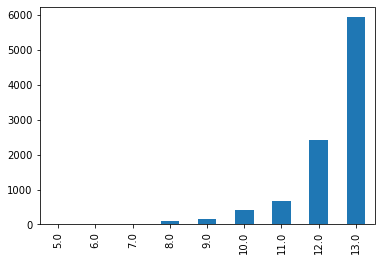

In [32]:
premios.category.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='category'>

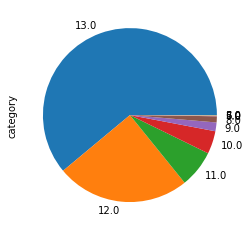

In [33]:
premios.category.value_counts().plot(kind='pie')

Vemos que la mayoría claramente son los premios de categoría menor, y que los premios de categoría alta son inapreciables.

Podemos graficar los premios con respecto al tiempo para ver si hay alguna relación, pero parece que la distribución temporal es aleatoria y no existe nigún patrón.

Podemos usar un scatter plot para visualizar la distribución de los premios con respecto a las fecha, aunque parece que en este caso no existe ningún patrón y la distribución es aleatoria, como era de esperar.

<AxesSubplot:xlabel='date', ylabel='category'>

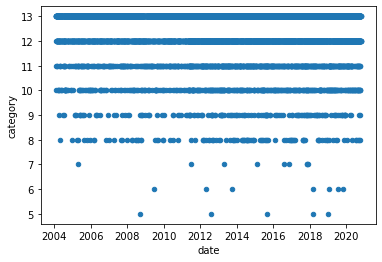

In [34]:
premios.plot(x='date', y='category', kind='scatter')

Podemos agrupar los datos por año y ver en que año hubiesemos obtenido el mayor número de premios, en este caso parece que en los años 2012, 2013 y 2014 hubiesemos tenido una buena racha.

In [35]:
premios.groupby(premios["date"].dt.year).category.count().sort_values(ascending=False)

date
2012    784
2014    768
2013    767
2018    750
2019    727
2016    724
2015    723
2017    721
2011    635
2020    600
2010    401
2005    364
2007    361
2004    356
2008    352
2009    351
2006    344
Name: category, dtype: int64